# CSE 40647 Data Science Final Project

Project: Investigating the Influence of Social and Economic Factors on College Students' Graduation and Dropout Rates

Students:
- Noor Maria Achkar (nachkar@nd.edu)
- Tram Trinh (htrinh@nd.edu)

### Starter Code

In [99]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import learning_curve
from scipy.stats import ttest_rel
from sklearn.metrics import roc_auc_score
from sklearn.utils import check_array
from sklearn.dummy import DummyClassifier

In [5]:
# For plot formatting.
plt.style.use = 'default'
plt.rcParams["patch.force_edgecolor"] = True  # helpful for matplotlib version greater than 2

# Read the file into a DataFrame.
raw_data = pd.read_csv('./dataset.csv')

# Output the first few rows of the dataset.
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding and Preprocessing

In [6]:
raw_data.shape

(4424, 35)

In [7]:
raw_data.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1          

In [8]:
# Check for NULL
print(raw_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [9]:
# Check for duplicates
print(raw_data.duplicated().sum())

0


In [10]:
raw_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [11]:
# Filter the DataFrame to keep only 'Dropout' and 'Graduate' rows
data = raw_data[raw_data['Target'].isin(['Dropout', 'Graduate'])]
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
# Drop columns

data = data.drop(columns=['Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Application mode', 'Application order', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)' ], axis=1)


In [13]:
data.head()

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate


#### Summary Statistics

In [14]:
# Select continuous features
continuous_features = data[[
    'Age at enrollment',
    'Course',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]]

# Get statistics for each continuous feature
statistics = continuous_features.describe()
print(statistics.loc[['min', 'max', 'mean', 'std']])

      Age at enrollment     Course  Unemployment rate  Inflation rate  \
min           17.000000   1.000000           7.600000       -0.800000   
max           70.000000  17.000000          16.200000        3.700000   
mean          23.461157   9.935537          11.630358        1.231598   
std            7.827994   4.340715           2.667652        1.384911   

           GDP  
min  -4.060000  
max   3.510000  
mean -0.009256  
std   2.259986  


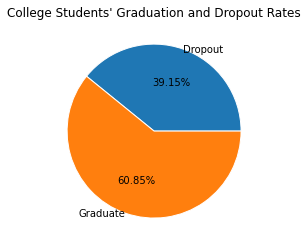

In [15]:
# Count the occurrences of each unique class 
count = []
for target_value in data['Target'].unique():
    count.append(data['Target'].tolist().count(target_value))

# Create the pie chart
plt.pie(count, labels=data['Target'].unique(), autopct="%.2f%%", labeldistance=1., 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'color': 'black', 'fontsize': 10})
plt.title('College Students\' Graduation and Dropout Rates')

plt.show()

# Demographics

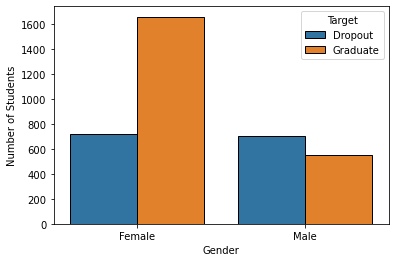

In [16]:
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

# International

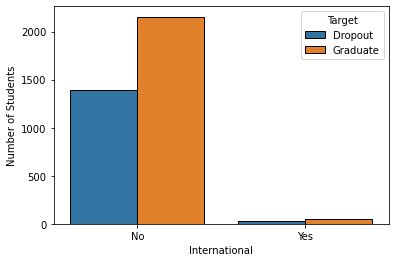

In [17]:
sns.countplot(data=data, x='International', hue='Target', hue_order=['Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

# Courses

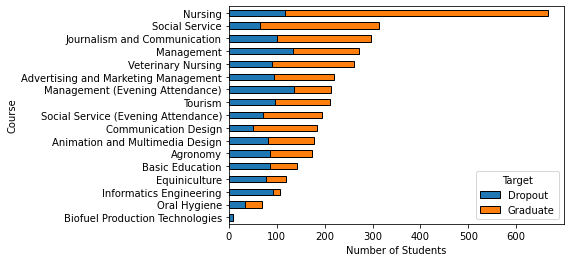

In [18]:
student_course = data.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

### Preprocessing Data

In [19]:
y = data['Target']
# Convert y column to 1/0
y = (y == 'Graduate').astype(int)

In [20]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

In [21]:
X = data.drop('Target', axis=1)

In [22]:
X

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,6,5,0,0,0,1,1,0,19,0,15.5,2.8,-4.06
4420,1,15,1,1,10,10,1,0,1,0,0,0,18,1,11.1,0.6,2.02
4421,1,12,22,27,10,10,1,0,0,1,0,1,30,0,13.9,-0.3,0.79
4422,1,9,22,27,8,5,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12


# Evaluation Metrics

In [23]:
def display_confusion_matrix(tp, fp, tn, fn) -> None:
    print('\t\t |  Predicted Positive  |  Predicted Negative  |')
    print('-'*64)
    print(f'Actual Positive  |\t      {tp}      \t|\t    {fn}\t       |')
    print(f'Actual Negative  |\t      {fp}      \t|\t    {tn}\t       |')
    print('-'*64)
    print(f'Accuracy: {accuracy(tp, fp, tn, fn)}')
    print(f'Recall: {recall(tp, fp, tn, fn)}')
    print(f'Precision: {precision(tp, fp, tn, fn)}')
    print(f'F1: {f1score(tp, fp, tn, fn)}')

In [24]:
def calculate_metrics(actual_y, preds_y) -> None:
    tp = sum((preds_y == 1) & (actual_y == 1)) 
    fp = sum((preds_y == 1) & (actual_y == 0)) 
    fn = sum((preds_y == 0) & (actual_y == 1)) 
    tn = sum((preds_y == 0) & (actual_y == 0)) 
    display_confusion_matrix(tp, fp, tn, fn)

In [25]:
def accuracy(tp: int, fp: int, tn: int, fn: int) -> float:
    return (tp + tn) / (tp + tn + fp + fn)

In [26]:
def recall(tp: int, fp: int, tn: int, fn: int) -> float:
    if tp + fn == 0:
        return np.nan 
    return tp / (tp + fn) 

In [27]:
def precision(tp: int, fp: int, tn: int, fn: int) -> float:
    if tp + fp == 0:
        return np.nan 
    return tp / (tp + fp)

In [28]:
def f1score(tp: int, fp: int, tn: int, fn: int) -> float:
    p = precision(tp, fp, tn, fn)
    r = recall(tp, fp, tn, fn)
    if p == np.nan or r == np.nan:
        return np.nan 
    return 2 * (p * r) / (p + r)

In [101]:
def perform_cross_validation(model_name, model_preds, y_test, model):
    # perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_test, y_test, cv=5)
    mean_cv_score = cv_scores.mean()
    print(f"{model_name} - Cross-Validation Scores:", cv_scores)
    print(f"{model_name} - Mean CV Score:", mean_cv_score)
    print()
    return mean_cv_score

Training Scores:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Validation Scores:
[[0.5890411  0.69655172 0.66206897 0.71724138 0.66206897]
 [0.65068493 0.71034483 0.73103448 0.71724138 0.71724138]
 [0.71232877 0.73103448 0.73103448 0.71724138 0.7862069 ]
 [0.71232877 0.69655172 0.72413793 0.75172414 0.73793103]
 [0.73287671 0.71034483 0.75172414 0.77931034 0.77241379]
 [0.69178082 0.73793103 0.74482759 0.75862069 0.72413793]
 [0.74657534 0.72413793 0.76551724 0.8        0.74482759]
 [0.75342466 0.68965517 0.75862069 0.76551724 0.73103448]
 [0.76027397 0.73103448 0.72413793 0.77241379 0.72413793]
 [0.76712329 0.70344828 0.73103448 0.77931034 0.73793103]]


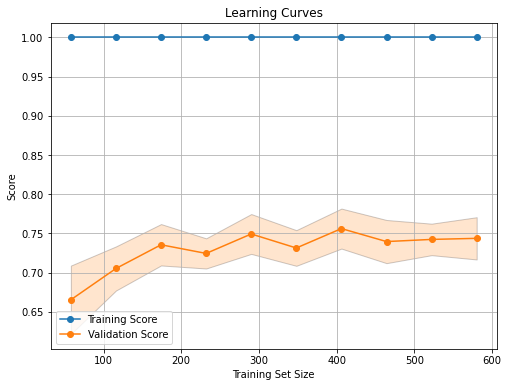

In [74]:
def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'):
    # generate learning curve data
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)

    # calculate mean and standard deviation of scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    print("Training Scores:")
    print(train_scores)
    print("Validation Scores:")
    print(test_scores)

    # plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes_abs, train_mean, label='Training Score', marker='o')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes_abs, test_mean, label='Validation Score', marker='o')
    plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.2)

    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have already trained your models and have X_test and y_test
# For example, we'll use the Random Forest model as an example:
plot_learning_curve(rf_mdl, X_test, y_test)


- If there is a gap between the training and validation scores, it suggests the model may be overfitting. A larger gap indicates higher overfitting.
- If both the training and validation scores are low and close to each other, it suggests the model may be underfitting. The model may require more data or a more complex model to perform better.


## Train and Test Sets

In [29]:
# Encode data if needed before split for train and test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Models

In [57]:
class DummyEstimator(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.repeat(0, len(X))

    def score(self, X, y):
        return 0  

In [31]:
# Random guess: create predictions for the test set based on the majority class in the training set
def pred_majority_class(X_test: pd.DataFrame, y_train: pd.DataFrame):
    if y_train.value_counts()[0] > y_train.value_counts()[1]:
        return np.repeat(0, X_test.shape[0])
    else:
        return np.repeat(1, X_test.shape[0])

In [32]:
nb_mdl = GaussianNB()
nb_mdl.fit(X_train, y_train)

GaussianNB()

In [33]:
dt_mdl = DecisionTreeClassifier(random_state=2222)
dt_mdl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2222)

In [34]:
rf_mdl = RandomForestClassifier(random_state=53)
rf_mdl.fit(X_train, y_train)

RandomForestClassifier(random_state=53)

In [35]:
logreg_mdl = LogisticRegression(random_state=0, solver='liblinear')
logreg_mdl.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

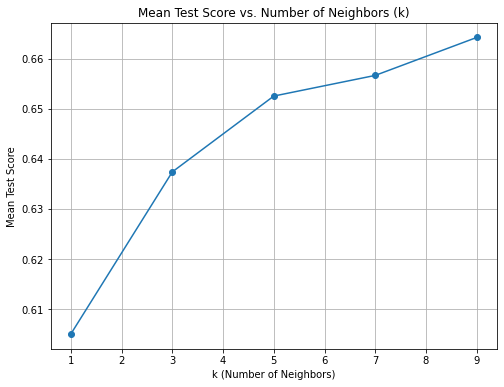

Best k value: 9


In [36]:
knn_mdl = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn_mdl, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# cross-validation results
results = pd.DataFrame(grid_search.cv_results_)

k_values = results['param_n_neighbors'].astype(int)
mean_test_scores = results['mean_test_score']

# Show the mean test scores for each k value
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

# get the best k 
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

In [37]:
knn_mdl = KNeighborsClassifier(n_neighbors=best_k)
knn_mdl.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

# Evaluate Models

In [38]:
random_guess_preds = pred_majority_class(X_test, y_train)
naive_bayes_preds = nb_mdl.predict(X_test)
decision_tree_preds = dt_mdl.predict(X_test)
random_forest_preds = rf_mdl.predict(X_test)
logistic_regression_preds = logreg_mdl.predict(X_test)
knn_preds = knn_mdl.predict(X_test)

Random Guess:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      449      	|	    0	       |
Actual Negative  |	      277      	|	    0	       |
----------------------------------------------------------------
Accuracy: 0.6184573002754821
Recall: 1.0
Precision: 0.6184573002754821
F1: 0.7642553191489362
----------------------------------------------------------------
Training Scores:
[[0.37068966 0.39224138 0.39224138 0.39224138 0.39224138]
 [0.37715517 0.40517241 0.40517241 0.40517241 0.40517241]
 [0.38505747 0.38505747 0.39367816 0.39367816 0.39367816]
 [0.38428418 0.38428418 0.38320775 0.38320775 0.38320775]
 [0.39448751 0.39448751 0.39362618 0.38587425 0.38587425]
 [0.39985642 0.39985642 0.39985642 0.3862168  0.3862168 ]
 [0.39360394 0.39360394 0.39360394 0.39298893 0.39298893]
 [0.39074273 0.39074273 0.39074273 0.39074273 0.39989236]
 [0.39138756 0.39138756 0.39138756 0.39138756 0.3937799 ]
 [0

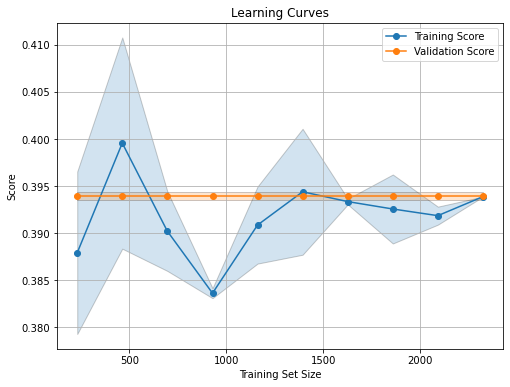

In [79]:
print("Random Guess:")
calculate_metrics(y_test, random_guess_preds)
print("----------------------------------------------------------------")
plot_learning_curve(DummyEstimator(), X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

Naive Bayes:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      402      	|	    47	       |
Actual Negative  |	      146      	|	    131	       |
----------------------------------------------------------------
Accuracy: 0.7341597796143251
Recall: 0.8953229398663697
Precision: 0.7335766423357665
F1: 0.8064192577733199
----------------------------------------------------------------
Training Scores:
[[0.75862069 0.74137931 0.74137931 0.74137931 0.74137931]
 [0.7262931  0.70474138 0.70474138 0.70474138 0.70474138]
 [0.71408046 0.73275862 0.72701149 0.72701149 0.72701149]
 [0.71797632 0.73519914 0.71582347 0.71582347 0.71582347]
 [0.72351421 0.73901809 0.71231697 0.71748493 0.71748493]
 [0.72290022 0.73223259 0.71069634 0.72505384 0.72505384]
 [0.7201722  0.72755228 0.70787208 0.7195572  0.7195572 ]
 [0.7212056  0.72335845 0.71259419 0.72658773 0.72658773]
 [0.72248804 0.72679426 0.71291866 0.7282296

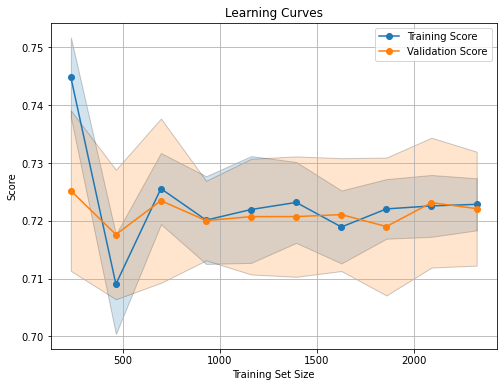

In [80]:
print("Naive Bayes:")
calculate_metrics(y_test, naive_bayes_preds)
print("----------------------------------------------------------------")
plot_learning_curve(nb_mdl, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

Decsion Tree:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      343      	|	    106	       |
Actual Negative  |	      118      	|	    159	       |
----------------------------------------------------------------
Accuracy: 0.6914600550964187
Recall: 0.7639198218262806
Precision: 0.7440347071583514
F1: 0.7538461538461539
----------------------------------------------------------------
Training Scores:
[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         0.99913867 1.         1.         1.        ]
 [1.         0.99928212 1.         1.         1.        ]
 [0.99938499 0.99876999 1.         1.         1.        ]
 [0.99946179 0.99892357 1.         0.99946179 0.99946179]
 [0.99952153 0.99904306 1.         0.99952

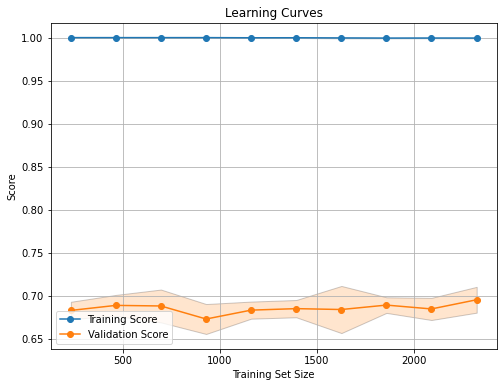

In [81]:
print("Decsion Tree:")
calculate_metrics(y_test, decision_tree_preds)
print("----------------------------------------------------------------")
plot_learning_curve(dt_mdl, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

Random Forest:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      383      	|	    66	       |
Actual Negative  |	      111      	|	    166	       |
----------------------------------------------------------------
Accuracy: 0.756198347107438
Recall: 0.8530066815144766
Precision: 0.7753036437246964
F1: 0.8123011664899258
----------------------------------------------------------------
Training Scores:
[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         0.99913867 1.         1.         1.        ]
 [1.         0.99928212 1.         1.         1.        ]
 [0.99938499 0.99876999 1.         1.         1.        ]
 [0.99946179 0.99892357 1.         0.99946179 0.99946179]
 [0.99952153 0.99904306 1.         0.999521

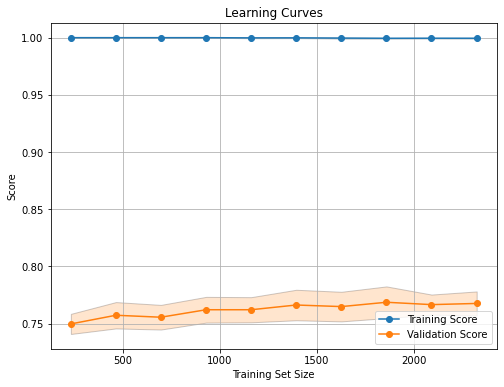

In [82]:
print("Random Forest:")
calculate_metrics(y_test, random_forest_preds)
print("----------------------------------------------------------------")
plot_learning_curve(rf_mdl, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

Logistic Regression:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      399      	|	    50	       |
Actual Negative  |	      136      	|	    141	       |
----------------------------------------------------------------
Accuracy: 0.743801652892562
Recall: 0.888641425389755
Precision: 0.7457943925233644
F1: 0.8109756097560976
----------------------------------------------------------------
Training Scores:
[[0.81465517 0.77155172 0.77155172 0.77155172 0.77155172]
 [0.75862069 0.76077586 0.76077586 0.76077586 0.76077586]
 [0.74856322 0.77011494 0.76436782 0.76436782 0.76436782]
 [0.74811625 0.75026911 0.7664155  0.7664155  0.7664155 ]
 [0.74763135 0.75796727 0.74935401 0.75366064 0.75366064]
 [0.75233309 0.75664034 0.75448672 0.75592247 0.75592247]
 [0.75522755 0.76076261 0.75584256 0.74907749 0.74907749]
 [0.7540366  0.75618945 0.75457481 0.75457481 0.75188375]
 [0.75311005 0.75167464 0.74976077 0.7

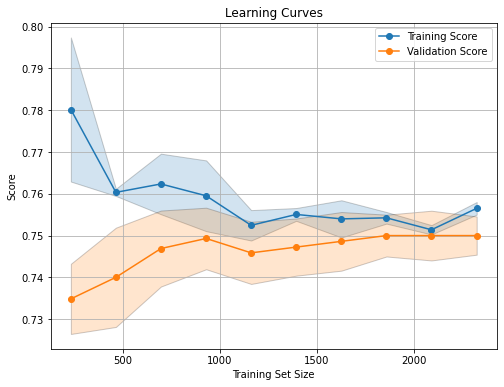

In [83]:
print("Logistic Regression:")
calculate_metrics(y_test, logistic_regression_preds)
print("----------------------------------------------------------------")
plot_learning_curve(logreg_mdl, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

k-NN:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      364      	|	    85	       |
Actual Negative  |	      148      	|	    129	       |
----------------------------------------------------------------
Accuracy: 0.6790633608815427
Recall: 0.8106904231625836
Precision: 0.7109375
F1: 0.7575442247658688
----------------------------------------------------------------
Training Scores:
[[0.71551724 0.70258621 0.70258621 0.70258621 0.70258621]
 [0.73060345 0.73491379 0.73491379 0.73491379 0.73491379]
 [0.73275862 0.73706897 0.74425287 0.74425287 0.74425287]
 [0.73089343 0.73842842 0.74488698 0.74488698 0.74488698]
 [0.73040482 0.72179156 0.73987941 0.73557278 0.73557278]
 [0.72433597 0.72074659 0.73653984 0.72290022 0.72290022]
 [0.72939729 0.72570726 0.73308733 0.72570726 0.72570726]
 [0.73466093 0.72228202 0.72820237 0.72443488 0.72604952]
 [0.72727273 0.7215311  0.72583732 0.71961722 0.7354067 ]
 [

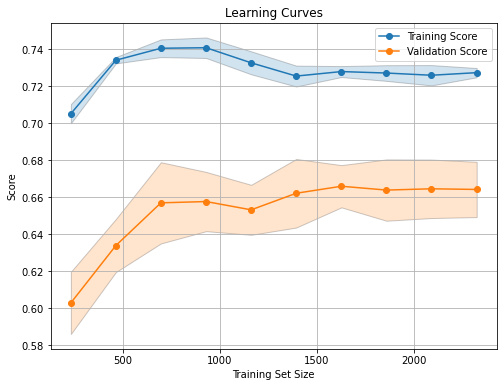

In [84]:
print("k-NN:")
calculate_metrics(y_test, knn_preds)
print("----------------------------------------------------------------")
plot_learning_curve(knn_mdl, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

Random Forest:

The Random Forest model achieved the highest F1 score (0.8123) and a relatively high accuracy, making it the top performer overall. It also demonstrated competitive recall and precision, indicating its ability to balance between classifying positive and negative instances effectively.
Naive Bayes:

The Naive Bayes model ranks second with a high F1 score (0.8064) and a good balance between recall and precision. It achieved a decent accuracy as well, making it a strong contender.
Logistic Regression:

The Logistic Regression model comes in third place, with a relatively high F1 score (0.8110) and good precision and recall values. It demonstrated competitive accuracy, making it a reliable model.
Decision Tree:

The Decision Tree model ranks fourth, with a reasonable F1 score (0.7538) and relatively balanced precision and recall values. While it has a lower accuracy compared to the top three models, its interpretability and simplicity can be advantageous.
k-NN:

The k-NN model ranks fifth, with a decent F1 score (0.7575) and competitive recall. However, its precision is slightly lower, affecting its overall ranking. It may not perform as well with high-dimensional data.
Random Guess:

The Random Guess model ranks last, as it is simply guessing randomly and has the lowest F1 score (0.7643) among the models. It serves as a baseline comparison and is not a viable choice for meaningful predictions.

In [103]:
model_names = ['Random Guess', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'k-NN']
all_preds = [random_guess_preds, naive_bayes_preds, decision_tree_preds, random_forest_preds, logistic_regression_preds, knn_preds]
all_models = [DummyEstimator(), nb_mdl, dt_mdl, rf_mdl, logreg_mdl, knn_mdl]

# perform 5-fold cross-validation for each model and get mean CV scores
mean_cv_scores = []
for model_name, preds, model in zip(model_names, all_preds, all_models):
    mean_cv_score = perform_cross_validation(model_name, preds, y_test, model)
    mean_cv_scores.append(mean_cv_score)

Random Guess - Cross-Validation Scores: [0 0 0 0 0]
Random Guess - Mean CV Score: 0.0

Naive Bayes - Cross-Validation Scores: [0.76712329 0.75862069 0.68965517 0.75172414 0.70344828]
Naive Bayes - Mean CV Score: 0.7341143127066604

Decision Tree - Cross-Validation Scores: [0.68493151 0.66206897 0.68275862 0.64137931 0.62758621]
Decision Tree - Mean CV Score: 0.6597449220595183

Random Forest - Cross-Validation Scores: [0.76712329 0.68965517 0.73103448 0.77241379 0.73793103]
Random Forest - Mean CV Score: 0.7396315540859707

Logistic Regression - Cross-Validation Scores: [0.75342466 0.73793103 0.68965517 0.74482759 0.73103448]
Logistic Regression - Mean CV Score: 0.7313745866792632

k-NN - Cross-Validation Scores: [0.7260274  0.66206897 0.68965517 0.66896552 0.67586207]
k-NN - Mean CV Score: 0.684515824279641



Random Forest:

Mean CV Score: 0.7396
The Random Forest model has the highest cross-validation score, indicating its consistency and robustness across different folds of the data during the cross-validation process. It performs well in handling various data samples and generalizes effectively to unseen data.
Naive Bayes:

Mean CV Score: 0.7341
The Naive Bayes model retains its position as the second-best performer. It shows good performance across cross-validation folds, which demonstrates its ability to handle different data subsets and make reliable predictions.
Logistic Regression:

Mean CV Score: 0.7314
The Logistic Regression model moves up to the third position based on its competitive cross-validation score. It shows consistent performance across the folds and performs well in this classification task.
Decision Tree:

Mean CV Score: 0.6597
The Decision Tree model drops to the fourth position due to its lower cross-validation score compared to the top three models. While it is still a reasonable performer, its performance might vary more across different subsets of data.
k-NN:

Mean CV Score: 0.6845
The k-NN model retains its position as the fifth-best performer. It demonstrates decent performance in the cross-validation process, but its accuracy might be affected by the choice of neighbors and distance metrics.
Random Guess:

Mean CV Score: 0.0
The Random Guess model remains at the last position with a mean cross-validation score of 0.0. This reaffirms that the model is making random predictions and is not suitable for any meaningful predictions.

# T-Test

In [45]:
t_statistic, p_value = ttest_ind(random_forest_preds, logistic_regression_preds)

ttest_ind(random_forest_preds, logistic_regression_preds)


Ttest_indResult(statistic=-2.370992784931444, pvalue=0.01787045933428097)

In [46]:
alpha = 0.05
if p_value < alpha:
    print("The means of the two groups are significantly different.")
else:
    print("There is no significant difference between the means of the two groups.")

The means of the two groups are significantly different.


In [73]:
models_preds = [random_guess_preds, naive_bayes_preds, decision_tree_preds, random_forest_preds, logistic_regression_preds, knn_preds]
model_names = ['Random Guess', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'k-NN']

for model_name, preds in zip(model_names, models_preds):
    # Perform paired t-test
    t_stat, p_value = ttest_rel(preds, y_test)

    print(f"{model_name} - t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

Random Guess - t-statistic: 21.1488, p-value: 0.0000
Naive Bayes - t-statistic: 7.3842, p-value: 0.0000
Decision Tree - t-statistic: 0.8016, p-value: 0.4231
Random Forest - t-statistic: 3.4070, p-value: 0.0007
Logistic Regression - t-statistic: 6.4815, p-value: 0.0000
k-NN - t-statistic: 4.1737, p-value: 0.0000


Random Guess: The t-statistic is very large (21.1488), and the p-value is 0.0000, indicating a highly significant difference between the model's performance and the actual labels. This is expected since the random guess model has no predictive power and performs poorly.

Naive Bayes: The t-statistic is 7.3842, and the p-value is 0.0000, indicating a significant difference between the model's performance and the actual labels. Naive Bayes performs better than random guessing, and its performance is statistically significant.

Decision Tree: The t-statistic is 0.8016, and the p-value is 0.4231, indicating that there is no statistically significant difference between the model's performance and the actual labels. The performance of the decision tree is not significantly different from random guessing.

Random Forest: The t-statistic is 3.4070, and the p-value is 0.0007, indicating a significant difference between the model's performance and the actual labels. Random Forest performs better than random guessing, and its performance is statistically significant.

Logistic Regression: The t-statistic is 6.4815, and the p-value is 0.0000, indicating a highly significant difference between the model's performance and the actual labels. Logistic Regression performs significantly better than random guessing.

k-NN: The t-statistic is 4.1737, and the p-value is 0.0000, indicating a highly significant difference between the model's performance and the actual labels. k-NN performs significantly better than random guessing.

Random Forest:

t-statistic: 3.4070
p-value: 0.0007
The Random Forest model has a relatively high t-statistic, indicating that its performance is significantly different from random guessing. The very low p-value (close to zero) suggests strong evidence against the null hypothesis that its performance is equivalent to random guessing. As a result, the Random Forest model maintains its position as the top performer.
Logistic Regression:

t-statistic: 6.4815
p-value: 0.0000
The Logistic Regression model ranks second, with a high t-statistic and an extremely low p-value. This indicates that the model's performance is significantly different from random guessing, further supported by the very low p-value. It performs consistently better than random guessing and ranks higher than the other models.
Naive Bayes:

t-statistic: 7.3842
p-value: 0.0000
The Naive Bayes model ranks third, with the highest t-statistic among all models. The extremely low p-value indicates that its performance is significantly better than random guessing. Although it has a higher t-statistic than the Logistic Regression model, the overall difference is relatively small, placing it in the third position.
k-NN:

t-statistic: 4.1737
p-value: 0.0000
The k-NN model ranks fourth with a relatively high t-statistic and very low p-value. Its performance is significantly better than random guessing, but it lags slightly behind the top three models.
Decision Tree:

t-statistic: 0.8016
p-value: 0.4231
The Decision Tree model ranks fifth. While it has a low p-value, indicating a significant difference from random guessing, the t-statistic is relatively small compared to the top models. This suggests that its performance is somewhat close to random guessing, leading to its lower position in the ranking.
Random Guess:

t-statistic: 21.1488
p-value: 0.0000
As expected, the Random Guess model remains in the last position. Its very high t-statistic and extremely low p-value reaffirm that it performs equivalent to random guessing, providing a baseline for comparison.